In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('polynomial_regression_train.csv')

In [4]:
data

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,1,-0.299150,0.980381,-1.244780,0.420551,-0.352235,8.168743e-10
1,2,-0.374319,-1.179867,0.615588,0.054701,0.687182,-5.081225e-10
2,3,-1.240429,-0.139086,-0.001653,0.487685,-0.242808,4.560170e-10
3,4,-0.429881,-1.724246,-0.098046,0.896504,0.318585,-2.647546e-09
4,5,-1.726345,1.945823,1.275979,-0.474670,1.050494,-1.704606e-08
...,...,...,...,...,...,...,...
47995,47996,1.125337,0.229907,-1.789732,-0.571275,-1.900555,7.752513e-09
47996,47997,1.733309,-0.721866,0.958440,0.317420,0.108628,7.770135e-09
47997,47998,-1.677538,1.758274,1.020534,0.346496,1.313755,-1.096204e-08
47998,47999,1.313345,0.315358,-0.060629,0.703251,-0.618520,1.962097e-09


In [5]:
X=data.iloc[:,1:-1].to_numpy()
y=data.iloc[:,-1].to_numpy()

In [6]:
X,y

(array([[-2.99150217e-01,  9.80381374e-01, -1.24478036e+00,
          4.20551444e-01, -3.52234517e-01],
        [-3.74319425e-01, -1.17986704e+00,  6.15588148e-01,
          5.47011163e-02,  6.87182229e-01],
        [-1.24042933e+00, -1.39085810e-01, -1.65302067e-03,
          4.87685105e-01, -2.42808052e-01],
        ...,
        [-1.67753838e+00,  1.75827436e+00,  1.02053447e+00,
          3.46495673e-01,  1.31375468e+00],
        [ 1.31334466e+00,  3.15358042e-01, -6.06291322e-02,
          7.03251230e-01, -6.18519654e-01],
        [-9.99869575e-01, -1.65745830e+00, -8.12632269e-01,
          1.01871706e+00, -1.23699276e+00]]),
 array([ 8.16874285e-10, -5.08122456e-10,  4.56017046e-10, ...,
        -1.09620443e-08,  1.96209742e-09,  5.00055158e-10]))

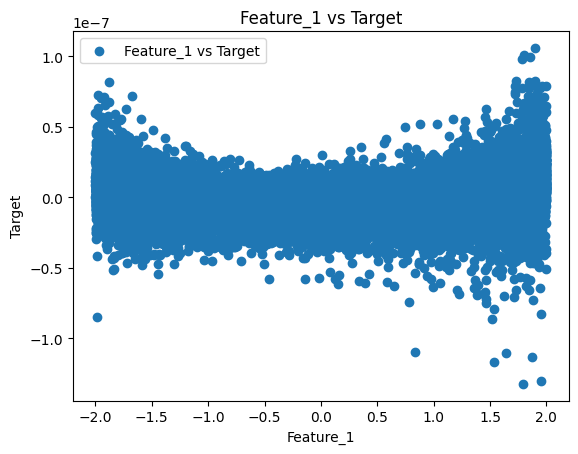

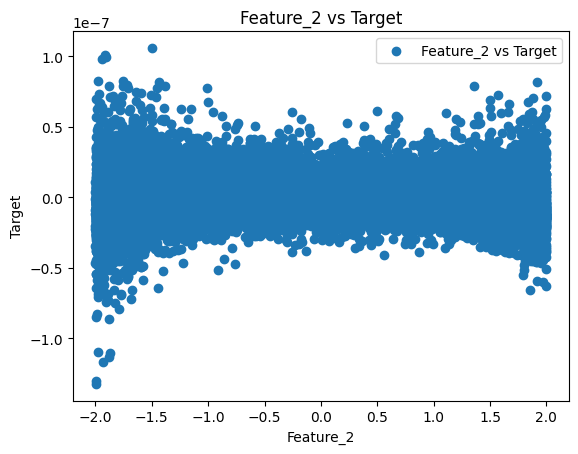

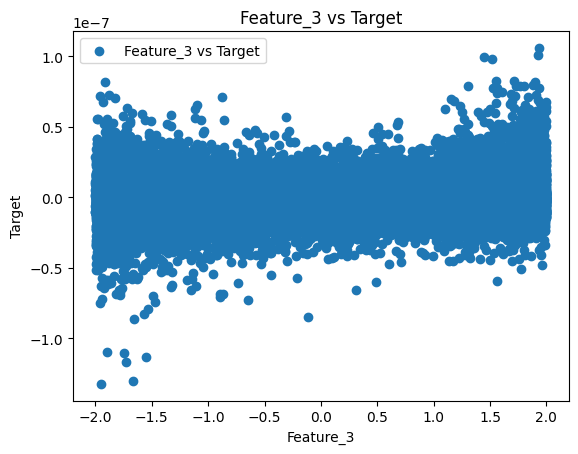

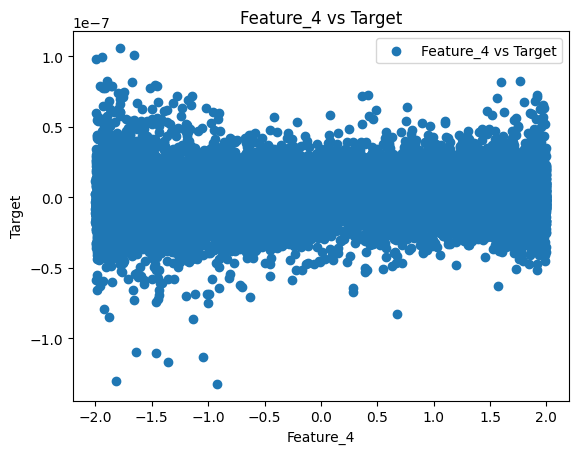

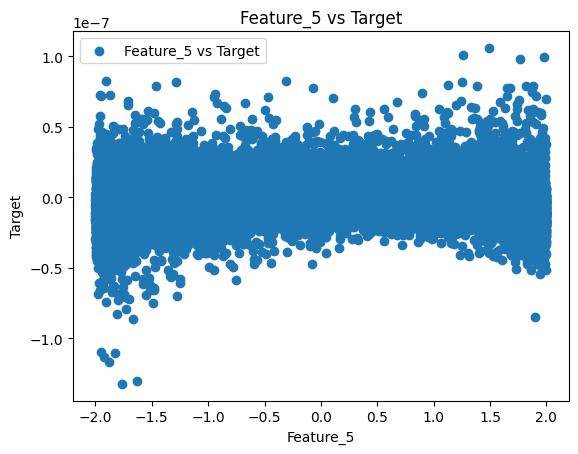

In [7]:
features = data.columns[:-1]  
target = data.columns[-1]     
features = [feature for feature in features if feature != 'ID']
for feature in features:
    plt.scatter(data[feature], data[target], label=f"{feature} vs {target}")
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{feature} vs {target}")
    plt.legend()
    plt.show()

In [8]:
def add_polynomial_features(X,degree):
    X_poly=X.copy()
    for d in range(2,degree+1):
        X_poly=np.hstack((X_poly,np.power(X,d)))
    return X_poly 

In [9]:
def z_score_normalize(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_scaled=(X-mean)/std
    return X_scaled

In [10]:
def compute_cost(X,y,w,b):
    m=X.shape[0]
    cost=0.0
    f_wb_i=np.dot(X,w)+b
    cost=np.sum((f_wb_i-y)**2)
    cost=cost/(2*m)
    return cost

In [11]:
def gradient_descent(X,y,w_in,b_in,cost_function,alpha,num_iters):
    J_history=[]
    w=w_in[:]
    b=b_in
    for i in range(num_iters):
        error=np.dot(X,w)+b
        dj_dw=(1/X.shape[0])*np.dot(X.T,(error-y))
        dj_db=(1/X.shape[0])*np.sum(error-y)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        J_history.append(cost_function(X,y,w,b))
        if i%100==0:
            print(f"Iteration{i}: Cost={cost_function(X,y,w,b)}")
    return w,b,J_history    

In [12]:
degree=3
X_poly=add_polynomial_features(X,degree)
X_scaled=z_score_normalize(add_polynomial_features(X,degree))
initial_w=np.ones(X_scaled.shape[1])
initial_b=0.
iterations=1000
alpha=0.005
w_final,b_final,J_hist=gradient_descent(X_scaled,y,initial_w,initial_b,compute_cost,alpha,iterations)


Iteration0: Cost=11.920345685836898
Iteration100: Cost=2.274230354004973
Iteration200: Cost=0.5279467529259134
Iteration300: Cost=0.1489358707493621
Iteration400: Cost=0.04809886644724238
Iteration500: Cost=0.01668969688142204
Iteration600: Cost=0.005983997651801169
Iteration700: Cost=0.0021762249688176646
Iteration800: Cost=0.0007968088318591031
Iteration900: Cost=0.0002932361830458719


In [13]:
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final}")
m,_=X.shape
for i in range(m):
    print(f"prediction: {np.dot(X_poly[i],w_final)+b_final:0.4f},target value: {y[i]}")

b,w found by gradient descent: -0.00,[ 0.00162885 -0.00243879  0.00051497  0.0038901   0.00079634  0.00681587
  0.00655276  0.00678059  0.00669095  0.00601043 -0.00181064  0.0024781
 -0.00036087 -0.00374788 -0.00063301]
prediction: 0.0200,target value: 8.16874285497803e-10
prediction: 0.0146,target value: -5.081224558274845e-10
prediction: 0.0156,target value: 4.560170458424261e-10
prediction: 0.0187,target value: -2.647545852529835e-09
prediction: 0.0829,target value: -1.7046057923449815e-08
prediction: 0.0224,target value: -3.4586550430730867e-10
prediction: 0.0646,target value: -7.451065283791374e-09
prediction: 0.0287,target value: 3.512554924806394e-09
prediction: 0.0451,target value: -1.3015137769212307e-09
prediction: 0.0537,target value: -9.762635182294588e-09
prediction: 0.0379,target value: 1.3486626634716357e-10
prediction: 0.0091,target value: 2.2043845130107502e-11
prediction: 0.0658,target value: -1.6461022303036067e-09
prediction: 0.0704,target value: 9.912258888558596e-

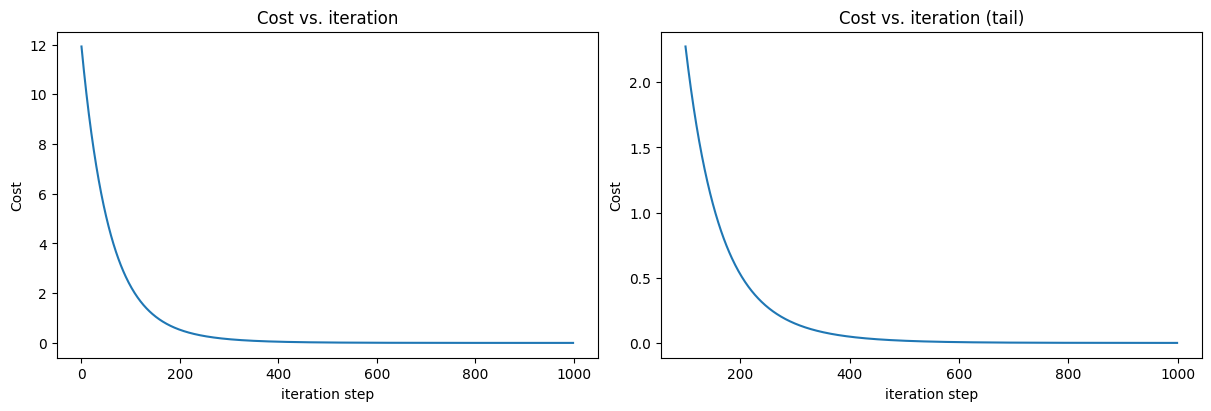

In [14]:
 fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [15]:
def r_squared(y, y_pred):
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2


In [18]:
X_scaled=z_score_normalize(X)
w_final=w_final[:5]
y_pred=np.dot(X_scaled,w_final)+b_final
r_2_error=r_squared(y,y_pred)
print(f"r_2_error={r_2_error:.4f}")

r_2_error=-215387195164.4794
